# Sentiment Analysis with Transformers using Python, PyTorch, and Hugging Face

## Introduction
Sentiment analysis is a natural language processing (NLP) task where the aim is to determine the sentiment behind a piece of text. With the advent of transformer models like BERT, GPT, and others, sentiment analysis has become more accurate and nuanced.

In this tutorial, we'll use Python, PyTorch, and the Hugging Face Transformers library to perform sentiment analysis. We'll be using Google Colab notebooks, which provide a free and powerful environment to run deep learning experiments.

## Setting Up the Environment
First, ensure you are in a Google Colab environment. Then, install the necessary packages:

In [2]:
!pip install -q torch transformers

After installation, let's check the versions of these packages for reproducibility:


In [3]:
import torch
import transformers

print("Torch version:", torch.__version__)
print("Transformers version:", transformers.__version__)

Torch version: 2.1.0+cu118
Transformers version: 4.35.2


## Importing Necessary Libraries

In [4]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from torch.nn.functional import softmax
import matplotlib.pyplot as plt

## Loading the Pre-trained Model and Tokenizer
We'll use a pre-trained model from Hugging Face. For this tutorial, let's use bert-base-uncased, which is a BERT model trained on English language:

In [10]:
model_name = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

## The Transformer Model
Transformer models like BERT use attention mechanisms to understand the context of words in a sentence. Unlike traditional models, they can handle word relationships regardless of their position.

## Preparing the Data
The tokenizer converts text into a format that the model can understand:

In [11]:
def tokenize(sentences):
    return tokenizer(sentences, padding=True, truncation=True, return_tensors="pt")

## Sentiment Analysis Function
We'll define a function to perform sentiment analysis:

In [12]:
def sentiment_analysis(sentence, model, tokenizer):
    tokens = tokenize([sentence])
    with torch.no_grad():
        outputs = model(**tokens)
    predictions = softmax(outputs.logits, dim=-1)
    return predictions

## Visualization Function
Visualizing results can be helpful:

In [13]:
def show_sentiments(sentences, model, tokenizer):
    fig, axs = plt.subplots(len(sentences), 1, figsize=(5, len(sentences) * 2))
    for i, sentence in enumerate(sentences):
        sentiments = sentiment_analysis(sentence, model, tokenizer).numpy()[0]
        axs[i].bar(['Negative', 'Positive'], sentiments)
        axs[i].set_title(sentence)
    plt.tight_layout()
    plt.show()

## Running the Analysis
Let's analyze some sentences:

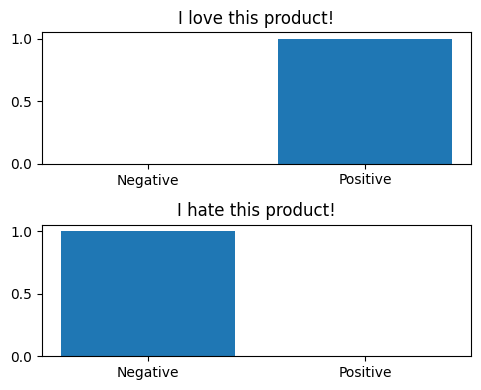

In [14]:
sentences = ["I love this product!", "I hate this product!"]
show_sentiments(sentences, model, tokenizer)

## Understanding the Code
1. Tokenization: Converts raw text into a format that the model can understand (input IDs, attention masks).
2. Model Prediction: The model predicts the sentiment scores for each sentence.
3. Softmax: Converts logits to probabilities.
4. Visualization: Bar plots to display sentiment scores.

## Conclusion
We've seen how to use a transformer model for sentiment analysis. This approach provides state-of-the-art results for NLP tasks.

